# Plots comparisons of ERA5-HEAT with our two climate models

In [1]:
import iris
from iris.experimental.equalise_cubes import equalise_attributes
from iris.util import unify_time_units
import iris.analysis.cartography
import iris.coord_categorisation
import matplotlib.pyplot as pl
import numpy as np
import scipy.stats as st
from tqdm import tqdm

In [2]:
import cartopy

In [3]:
era5heatdir = '/gws/pw/j05/cop26_hackathons/bristol/project10/era5-heat_1deg/'
modeldir = '/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/HadGEM3-GC31-LL/historical/r1i1p1f3/'
bccdir = '/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg/BCC-CSM2-MR/historical/r1i1p1f1/'

In [4]:
cube_era5 = iris.load(era5heatdir + 'ECMWF_utci_*_v1.0_con.nc')
equalise_attributes(cube_era5)
unify_time_units(cube_era5)
cube_era5 = cube_era5.concatenate_cube()

In [5]:
iris.coord_categorisation.add_month(cube_era5, 'time', name='month')
iris.coord_categorisation.add_year(cube_era5, 'time', name='year')
cube_era5_month = cube_era5.aggregated_by(['month','year'], iris.analysis.MEAN)
cube_era5_month

<iris 'Cube' of utci / (1) (time: 360; latitude: 180; longitude: 360)>

In [6]:
outdata_era5 = np.ones((360, 180, 360)) * np.ma.masked
for imonth in tqdm(range(360)):
    outdata_era5[imonth, ...] = cube_era5[imonth, ...].data

100%|██████████| 360/360 [00:36<00:00,  9.91it/s]


In [7]:
cube_model = iris.load(modeldir + 'utci_3hr_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_*.nc')
cube_model = cube_model.concatenate_cube()

In [8]:
cube_model.coord('time').points = cube_model.coord('time').points - 1/16
cube_model.coord('time')

DimCoord(array([48600.0625, 48600.1875, 48600.3125, ..., 59399.6875, 59399.8125,
       59399.9375]), standard_name='time', units=Unit('days since 1850-01-01', calendar='360_day'), long_name='time', var_name='time')

In [9]:
#result = cube_model.collapsed('time', iris.analysis.PERCENTILE, percent=[5, 95])

In [10]:
iris.coord_categorisation.add_month(cube_model, 'time', name='month')

In [11]:
iris.coord_categorisation.add_year(cube_model, 'time', name='year')

In [12]:
#cube_model_month = cube_model.aggregated_by(['month','year'], iris.analysis.PERCENTILE, percent=95)

In [13]:
cube_model_month = cube_model.aggregated_by(['month','year'], iris.analysis.MEAN)

In [14]:
cube_model_month

<iris 'Cube' of Universal Thermal Climate Index / (K) (time: 360; latitude: 180; longitude: 360)>

In [15]:
outdata_model = np.zeros((360, 180, 360))
for imonth in tqdm(range(360)):
    outdata_model[imonth, ...] = cube_model[imonth, ...].data

100%|██████████| 360/360 [00:11<00:00, 30.81it/s]


In [16]:
cube_bcc = iris.load(bccdir + 'utci_3hr_BCC-CSM2-MR_historical_r1i1p1f1_gn_*.nc')
cube_bcc = cube_bcc.concatenate_cube()
#cube_bcc.coord('time').points = cube_bcc.coord('time').points - 1/16
#cube_bcc.coord('time')

In [17]:
iris.coord_categorisation.add_month(cube_bcc, 'time', name='month')

In [18]:
iris.coord_categorisation.add_year(cube_bcc, 'time', name='year')

In [19]:
#cube_model_month = cube_model.aggregated_by(['month','year'], iris.analysis.PERCENTILE, percent=95)

In [20]:
cube_bcc_month = cube_bcc.aggregated_by(['month','year'], iris.analysis.MEAN)

In [21]:
cube_bcc_month

<iris 'Cube' of Universal Thermal Climate Index / (K) (time: 360; latitude: 180; longitude: 360)>

In [22]:
outdata_bcc = np.zeros((360, 180, 360))
for imonth in tqdm(range(360)):
    outdata_bcc[imonth, ...] = cube_bcc[imonth, ...].data

100%|██████████| 360/360 [00:09<00:00, 37.22it/s]


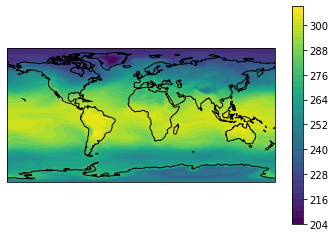

In [23]:
import cartopy.crs as ccrs
ax = pl.axes(projection=ccrs.PlateCarree())

pl.contourf(cube_model.coord('longitude').points, cube_model.coord('latitude').points, outdata_model.mean(axis=0), 40,
             transform=ccrs.PlateCarree())
ax.coastlines()
pl.colorbar()

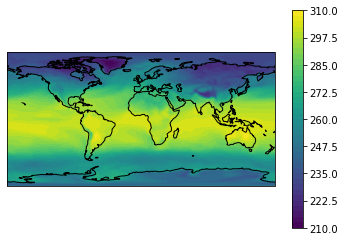

In [24]:
ax = pl.axes(projection=ccrs.PlateCarree())

pl.contourf(cube_bcc.coord('longitude').points, cube_bcc.coord('latitude').points, outdata_bcc.mean(axis=0), 40,
             transform=ccrs.PlateCarree())
ax.coastlines()
pl.colorbar()

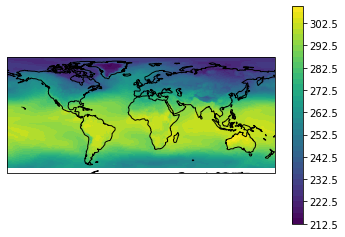

In [25]:
ax = pl.axes(projection=ccrs.PlateCarree())

pl.contourf(cube_model.coord('longitude').points, cube_model.coord('latitude').points, outdata_era5.mean(axis=0), 40,
             transform=ccrs.PlateCarree())
ax.coastlines()
pl.colorbar()

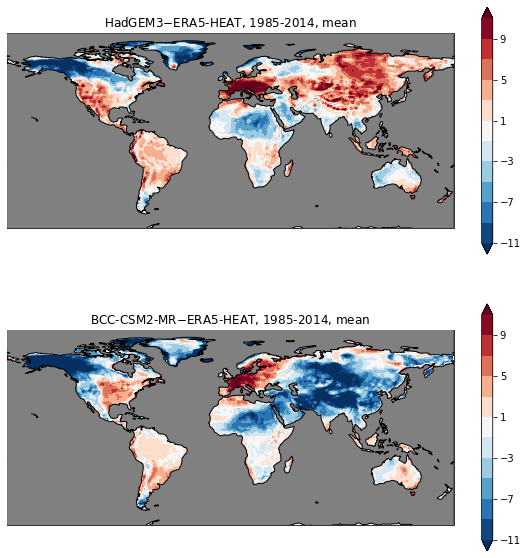

In [26]:
pl.figure(figsize=(10, 10))
#ax = pl.axes(projection=ccrs.PlateCarree())
ax1 = pl.subplot(2, 1, 1, projection=ccrs.PlateCarree())

cf1 = ax1.contourf(cube_model.coord('longitude').points, cube_model.coord('latitude').points, outdata_model.mean(axis=0)-outdata_era5.mean(axis=0), np.arange(-11,12,2), 
            cmap=pl.cm.RdBu_r, extend='both',
             transform=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k', facecolor='gray')
pl.colorbar(cf1)
ax1.set_title('HadGEM3$-$ERA5-HEAT, 1985-2014, mean')

ax2 = pl.subplot(2, 1, 2, projection=ccrs.PlateCarree())

cf2 = ax2.contourf(cube_model.coord('longitude').points, cube_model.coord('latitude').points, outdata_bcc.mean(axis=0)-outdata_era5.mean(axis=0), np.arange(-11,12,2), 
            cmap=pl.cm.RdBu_r, extend='both',
             transform=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k', facecolor='gray')
pl.colorbar(cf2)
ax2.set_title('BCC-CSM2-MR$-$ERA5-HEAT, 1985-2014, mean')

pl.savefig('../results/present-day-bias.png')

In [27]:
#cube_model_month95 = cube_model.aggregated_by(['month','year'], iris.analysis.PERCENTILE, percent=95)

In [28]:
cube_model_month# - cube_era5_month

<iris 'Cube' of Universal Thermal Climate Index / (K) (time: 360; latitude: 180; longitude: 360)>

In [29]:
outdata_model - outdata_era5

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-17.80971646621083, -17.762949468503024, -17.69203495232199,
          ..., -18.21931944519889, -18.02548369237755, --],
         [-16.553675449163222, -16.53895959380378, -16.568745847498292,
          ..., -16.84334318797295, -16.709435040855396, --],
         [-14.487600667307333, -14.498142417642441, -14.610691994207116,
          ..., -14.571361015910867, -14.61442628643374, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-18.652563493635427, -18.57190768355457, -18.381981319629034,
          ..., -19.038298241645037, -18.811649109676353, --],
         [-16.943703831144802, -16.93282493999726, -16.957930026183078,
          ..., -17.217480237810292, -17.09392791371198, --],
         [-15.982768709932799, -15.985432757662096,

In [30]:
cube_model_monthly = cube_model.aggregated_by(['month'], iris.analysis.MEAN)
cube_model_monthly

<iris 'Cube' of Universal Thermal Climate Index / (K) (time: 12; latitude: 180; longitude: 360)>

In [31]:
cube_era5_monthly = cube_model.aggregated_by(['month'], iris.analysis.MEAN)
cube_era5_monthly

<iris 'Cube' of Universal Thermal Climate Index / (K) (time: 12; latitude: 180; longitude: 360)>